**REGRESSION PROJECT**

**Hypothesis**

Holidays are a major factor of increased sales/ holidays positive impact on sales.

Sales in the month December are higher than the other months.

**Questions**

1. Which store_number had the highest sales
2. Which store_number had the highest number of transactions
3. Which year had the highest number of transactions
4. Which family/item had the highest sales(Top items with the highest sales)
5. Which year had the highest sales (plot year vs sale)
7. Which city had the highest number of stores
8. Which state had the highest number of stores
10. Which locale has the most holidays
11. Which locale name had the most holidays
12. what are the prices of oil over the given dates


Importing Libries

In [64]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import datetime
import calendar
import warnings
%matplotlib inline
import pathlib as path
import glob as glob
from os import walk
from sort_dataframeby_monthorweek import *
from chart_studio.plotly import plot
import plotly.graph_objects as go
import plotly.offline as py



Importing Dataset

In [38]:
#reading csv files
train = pd.read_csv (r"C:\Users\selas\OneDrive\Desktop\project 2 (regression ).csv\train.csv.csv")
test = pd.read_csv (r"C:\Users\selas\OneDrive\Desktop\project 2 (regression ).csv\test.csv.csv")
stores = pd.read_csv (r"C:\Users\selas\OneDrive\Desktop\project 2 (regression ).csv\stores.csv.csv")
sample_submissions = pd.read_csv (r"C:\Users\selas\OneDrive\Desktop\project 2 (regression ).csv\sample_submission.csv.csv")
holidays_events = pd.read_csv (r"C:\Users\selas\OneDrive\Desktop\project 2 (regression ).csv\holidays_events.csv.csv")
oil_prices = pd.read_csv (r"C:\Users\selas\OneDrive\Desktop\project 2 (regression ).csv\oil.csv.csv")
transactions = pd.read_csv (r"C:\Users\selas\OneDrive\Desktop\project 2 (regression ).csv\transactions.csv.csv")


**Exploring, Cleaning and Visualising all Datasets**

In [39]:
# puting all datasets in one dictionary in order to use it to check for missen values.
DATASETS = {'oil_prices':oil_prices,'sample_submissions':sample_submissions,'holidays_events':holidays_events,
            'stores':stores,'train':train,'test':test,'transactions':transactions}

In [40]:
#checking for missing values

for dataset in DATASETS: 
    print('-'*10)
    print(dataset)
    print('-'*10)
    print(DATASETS[dataset].isnull().sum())
    print()

----------
oil_prices
----------
date           0
dcoilwtico    43
dtype: int64

----------
sample_submissions
----------
id       0
sales    0
dtype: int64

----------
holidays_events
----------
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

----------
stores
----------
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

----------
train
----------
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

----------
test
----------
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

----------
transactions
----------
date            0
store_nbr       0
transactions    0
dtype: int64



From the above, we can see that out of all the datasets, only **oil_prices** have missen values. The rest of the dataset do not have missen values.

lets visualize all datasets.

In [41]:
train.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [42]:
# which store number had the highest sale
import math
sales_per_store_nmb= train.groupby('store_nbr')['sales'].sum().sort_values(ascending=False).reset_index().head(54)
sales_per_store_nmb['sales']=sales_per_store_nmb['sales'].apply(lambda x: math.ceil(x))
sales_per_store_nmb

,store_nbr,sales
0,44,62087554
1,45,54498011
2,47,50948311
3,3,50481911
4,49,43420096
5,46,41896063
6,48,35933131
7,51,32911490
8,8,30494287
9,50,28653021


**Which store_number had the highest sales**

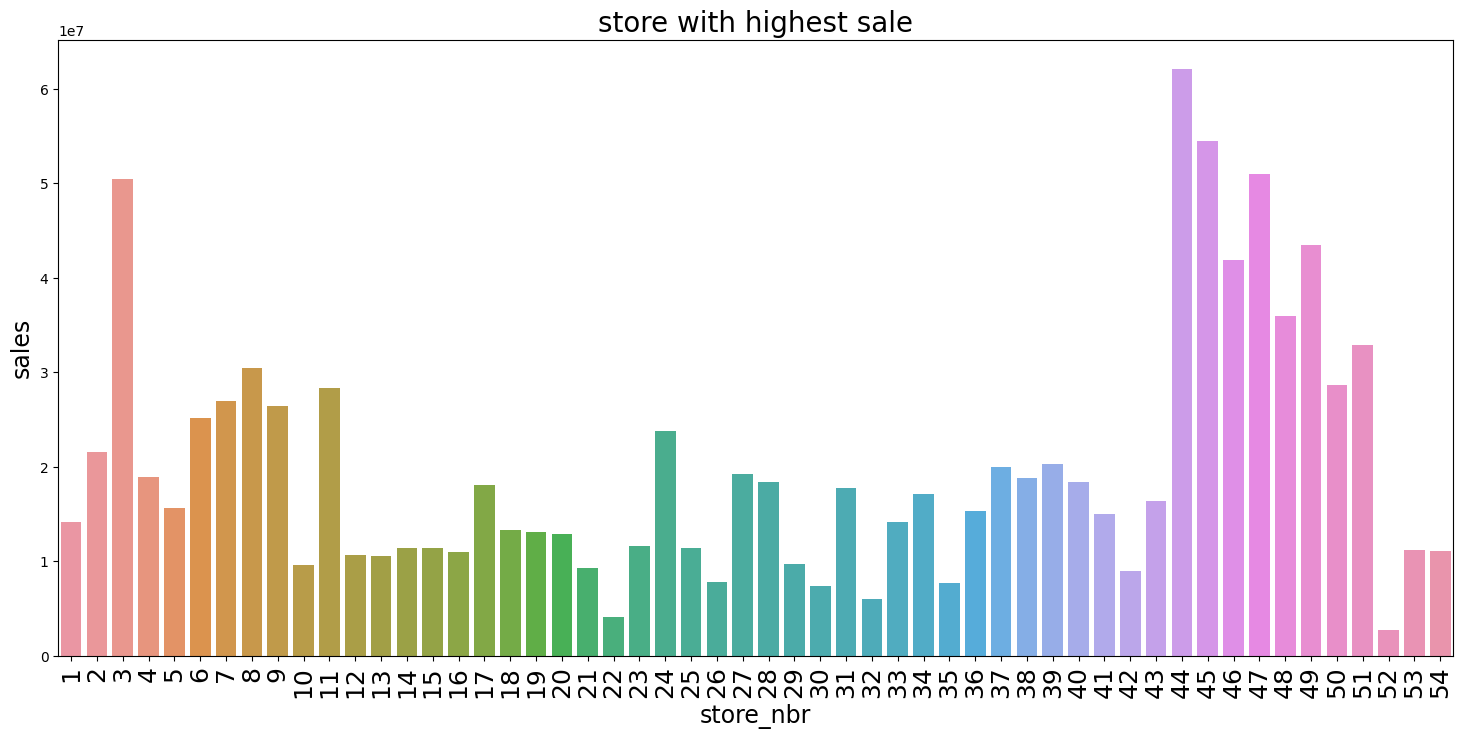

In [43]:
#ploting sales vs store number

plots=plt.figure(figsize=(18,8))
plots=plt.title('store with highest sale',fontsize=20)
plots=plt.xticks(fontsize=18,rotation='vertical')
plots=plt.xlabel('store_nbr',fontsize=17)
plots=plt.ylabel('sales',fontsize=17)
plots=sns.barplot(x='store_nbr',y='sales',data=sales_per_store_nmb)
plt.savefig('top10startups.png',dpi=300)

#for bar in plots.patches:
 #plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points')

plt.show()

from my bar graph, store number 44 has the highest sale and store number 52 has the lowest sale.

**Which store_number had the highest number of transactions**

In [44]:
transactions.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [45]:
store_no_wth_max_transactions = transactions.groupby(['store_nbr'], as_index=False).agg({'transactions':'sum'})
store_no_wth_max_transactions

,store_nbr,transactions
0,1,2553963
1,2,3219901
2,3,5366350
3,4,2519007
4,5,2347877
5,6,3065896
6,7,2995993
7,8,4637971
8,9,3516162
9,10,1652493


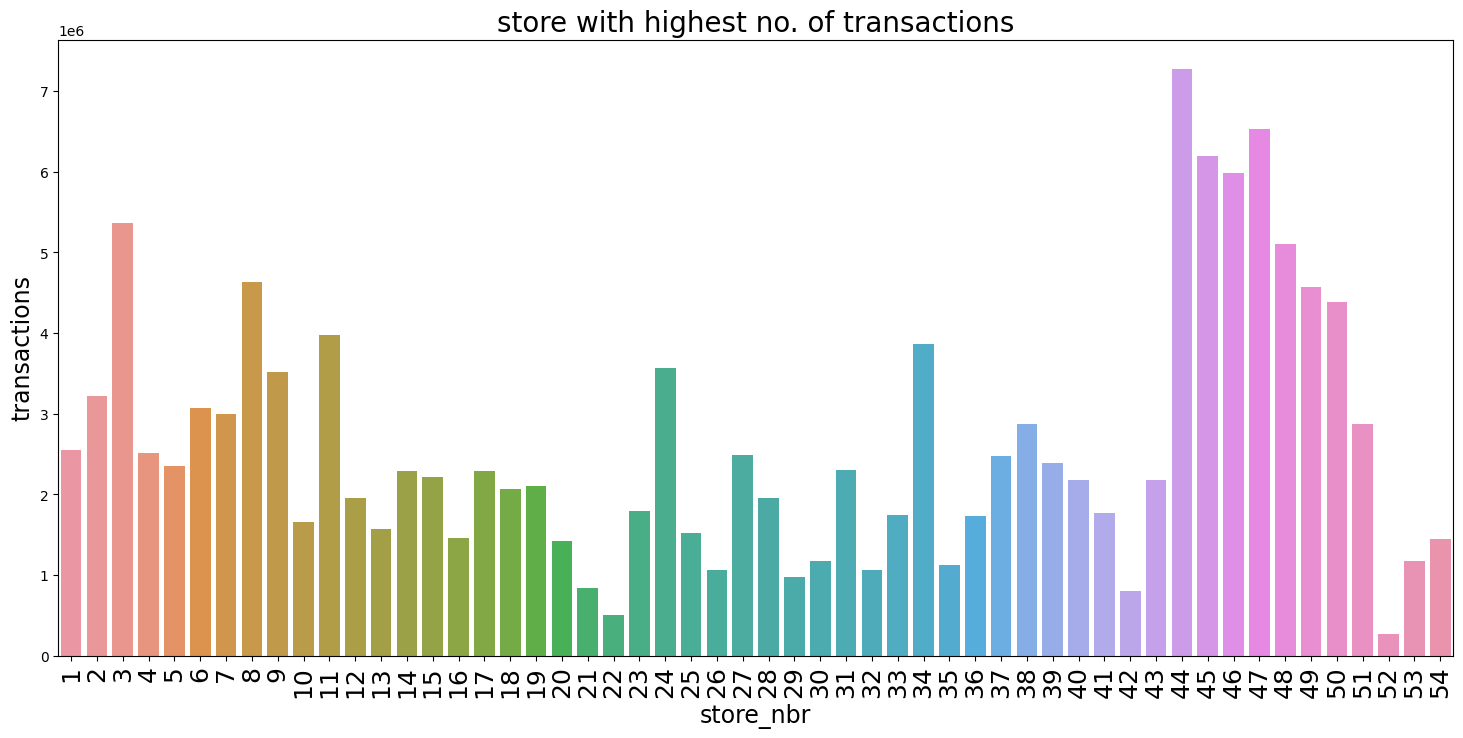

In [46]:
#plotting transactions vs store_nbr
plots=plt.figure(figsize=(18,8))
plots=plt.title('store with highest no. of transactions',fontsize=20)
plots=plt.xticks(fontsize=18,rotation='vertical')
plots=plt.xlabel('store_nbr',fontsize=17)
plots=plt.ylabel('sales',fontsize=17)
plots=sns.barplot(x='store_nbr',y='transactions',data=store_no_wth_max_transactions)
plt.savefig('top10startups.png',dpi=300)


Store_nbr 44 has the highest number of transactions. And store_nbr 52 has the lowest no of transactions

**Which year had the highest sales (plot year vs sale)**

In [47]:
#converting date column to datetime64 type
train['date'] = train['date'].astype('datetime64')

# getting year out of the date column in the train dataset.
train['year'] = train['date'].dt.year
train

,id,date,store_nbr,family,sales,onpromotion,year
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013
1,1,2013-01-01,1,BABY CARE,0.000,0,2013
2,2,2013-01-01,1,BEAUTY,0.000,0,2013
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013
4,4,2013-01-01,1,BOOKS,0.000,0,2013
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017


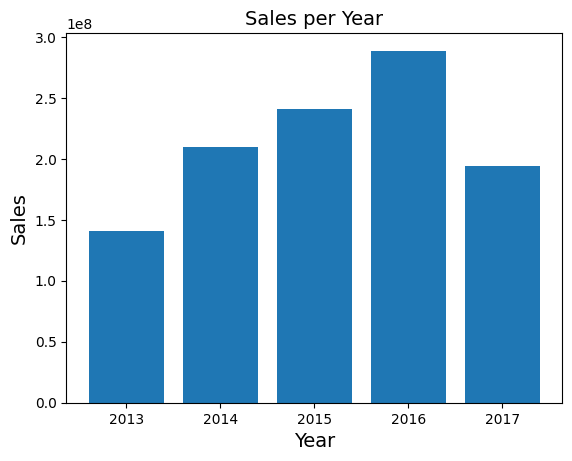

In [48]:
# Group By Year and Sum of sales for each year
ywhs=train.groupby(['year'], as_index=False).agg({'sales':'sum'})

#Plotting year Vs sales
plots=plt.bar(ywhs.year, ywhs.sales)
plt.title('Sales per Year',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Year',fontsize=14)

#for bar in plots.patches:
 #plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points')
plt.show()


The graph is showing that Sales are increasing each year except 2017. So lets go on and view each years sales and see why sales dropped in 2017.

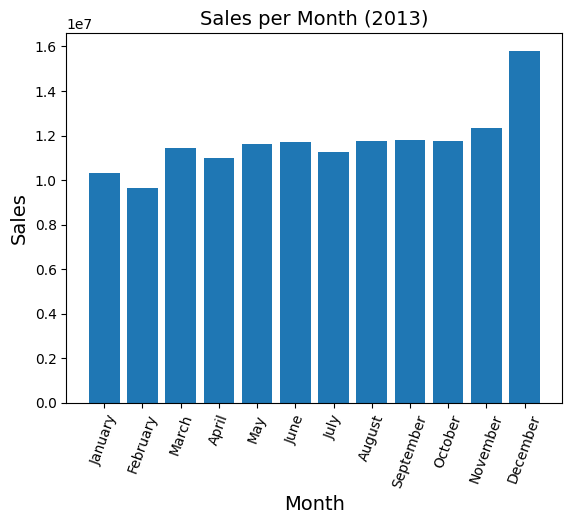

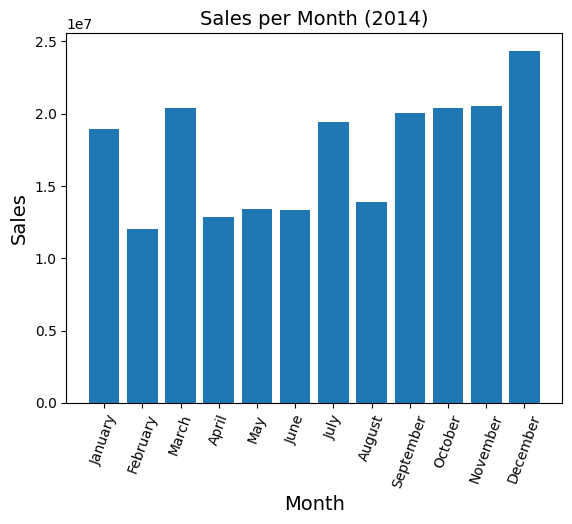

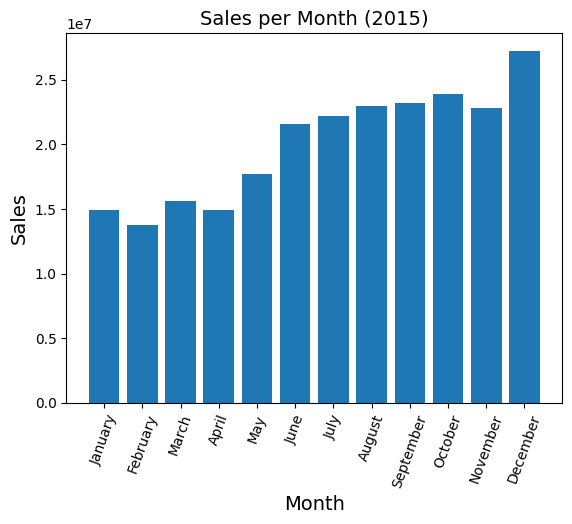

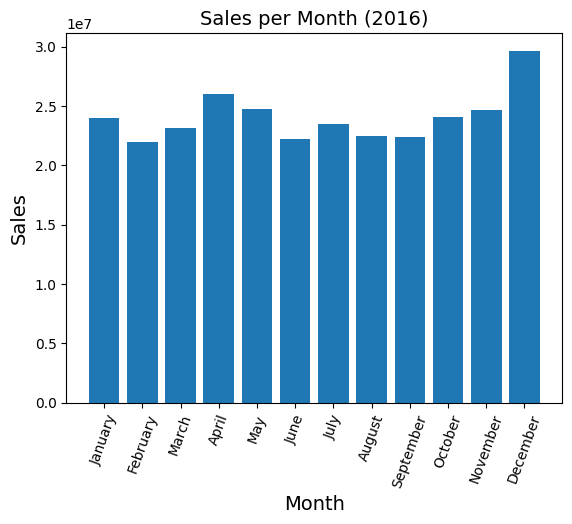

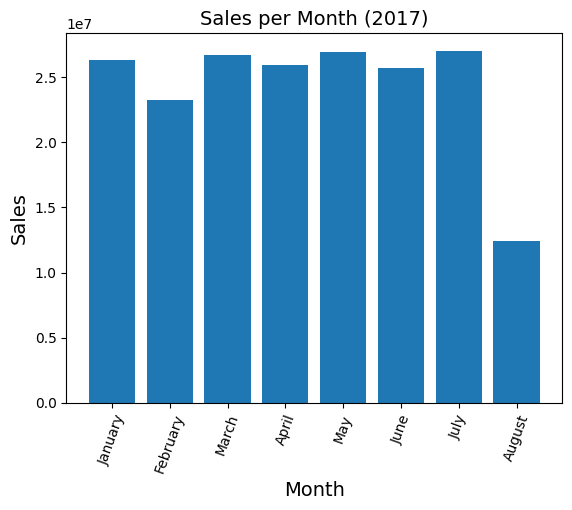

In [49]:
for year in train["date"].dt.year.unique():
    #Filtering data for specific year
    x = train[train["date"].dt.year == year]

    #Extracting month name from date
    x['month']=x['date'].dt.month_name()

    #Grouping data by months and adding sales
    x=x.groupby(['month'], as_index=False).agg({'sales':'sum'})
    
    #Sorting dataframe by Month
    x = Sort_Dataframeby_Month(df = x,monthcolumnname='month')

    #Plotting month Vs unit_sales for every year
    #plt.figure(figsize=(12,8))
    plt.bar(x.month, x.sales)
    plt.xticks(rotation=70)
    plt.title("Sales per Month ("+str(year)+")",fontsize=14)
    plt.ylabel('Sales',fontsize=14)
    plt.xlabel('Month',fontsize=14)
    warnings.filterwarnings('ignore')
    plt.show()
    #del x


December has the maximum sales every year. We can assume this is due to Christmas season

February month has the minimum sales every year.

This confirms that the sales vary with the 'Date' and there is a seasonality factor present in the data.
Now we know why 2017 sales did not increase.this is because, sales data for the year 2017 is only till 15th of August.

In [66]:
#Filtering data having year = 2016 only
train_2016 = train[train["date"].dt.year==2016]

In [67]:
# Group By day_of_week and Sum of unit_sales for each day_of_week
#train_2016 = train[train['date'].dt.year==2016]
train_2016['day_of_week'] = train_2016['date'].dt.day_of_week()

x = train_2016.groupby(['day_of_week'], as_index=False).agg({'sales':'sum'})

#Sorting Dataframe by Week_day
x = Sort_Dataframeby_Weekday(df = x, Weekdaycolumnname='day_of_week')

#Plotting day_of_week Vs unit_sales
plt.figure(figsize=(8,5))
plt.bar(x.day_of_week, x.sales)
plt.title('Sales per Day of week (2016)', fontsize= 14)
plt.xlabel('Day of week', fontsize= 14)
plt.ylabel('Sales', fontsize= 14)
del x


TypeError: 'Series' object is not callable

**Which family/item had the highest sales(Top items with the highest sales)**

In [ ]:
import math
sales_per_family = train.groupby('family')['sales'].sum().sort_values(ascending=False).reset_index().head(33)
sales_per_family['sales'] = sales_per_family['sales'].apply(lambda x: math.ceil(x))
sales_per_family


,family,sales
0,GROCERY I,343462735
1,BEVERAGES,216954486
2,PRODUCE,122704685
3,CLEANING,97521289
4,DAIRY,64487709
5,BREAD/BAKERY,42133946
6,POULTRY,31876005
7,MEATS,31086469
8,PERSONAL CARE,24592051
9,DELI,24110323


Text(0, 0.5, 'sales')

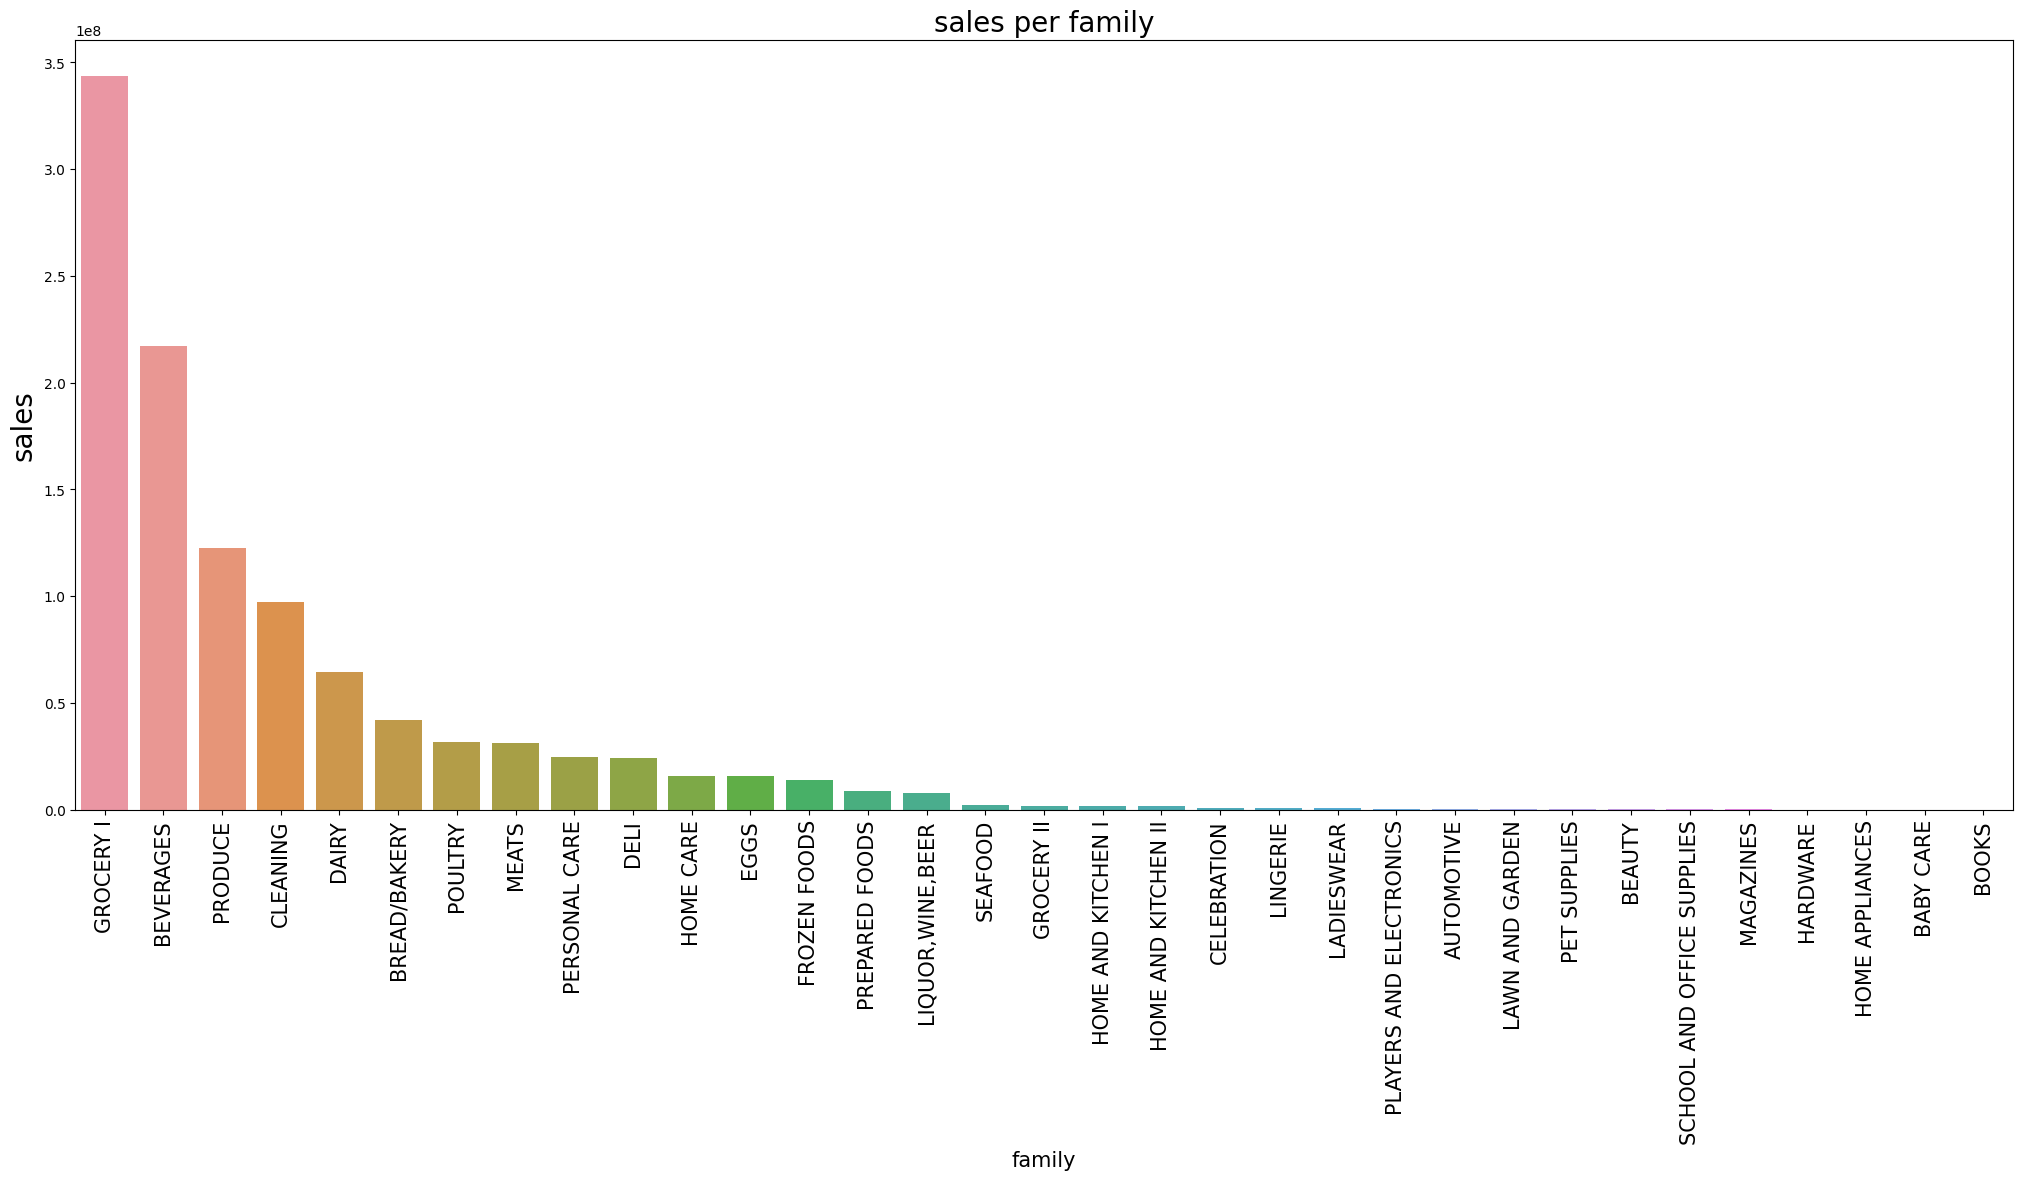

In [ ]:
#Fetching no.of stores in each state
x = sales_per_family

#Plotting city Vs no.of stores
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
plots = sns.barplot(x = x.family, y= "sales",data=x)
plots.set_xticklabels(ax.get_xticklabels(), rotation = 'vertical', fontsize = 15)
#plots=plt.xticks(fontsize=18,rotation='vertical')
plt.title('sales per family',fontsize=20)
plt.xlabel('family',fontsize=15)
plt.ylabel('sales',fontsize=20)



In [ ]:
import math
onpromo= train.groupby('onpromotion')['sales'].sum().sort_values(ascending=False).reset_index().head(10)
onpromo['sales']=onpromo['sales'].apply(lambda x: math.ceil(x))
onpromo

,onpromotion,sales
0,0,378139782
1,1,81612461
2,2,52627015
3,3,39964518
4,4,30706575
5,5,24801593
6,6,22583600
7,7,19343902
8,8,18310938
9,9,17433466


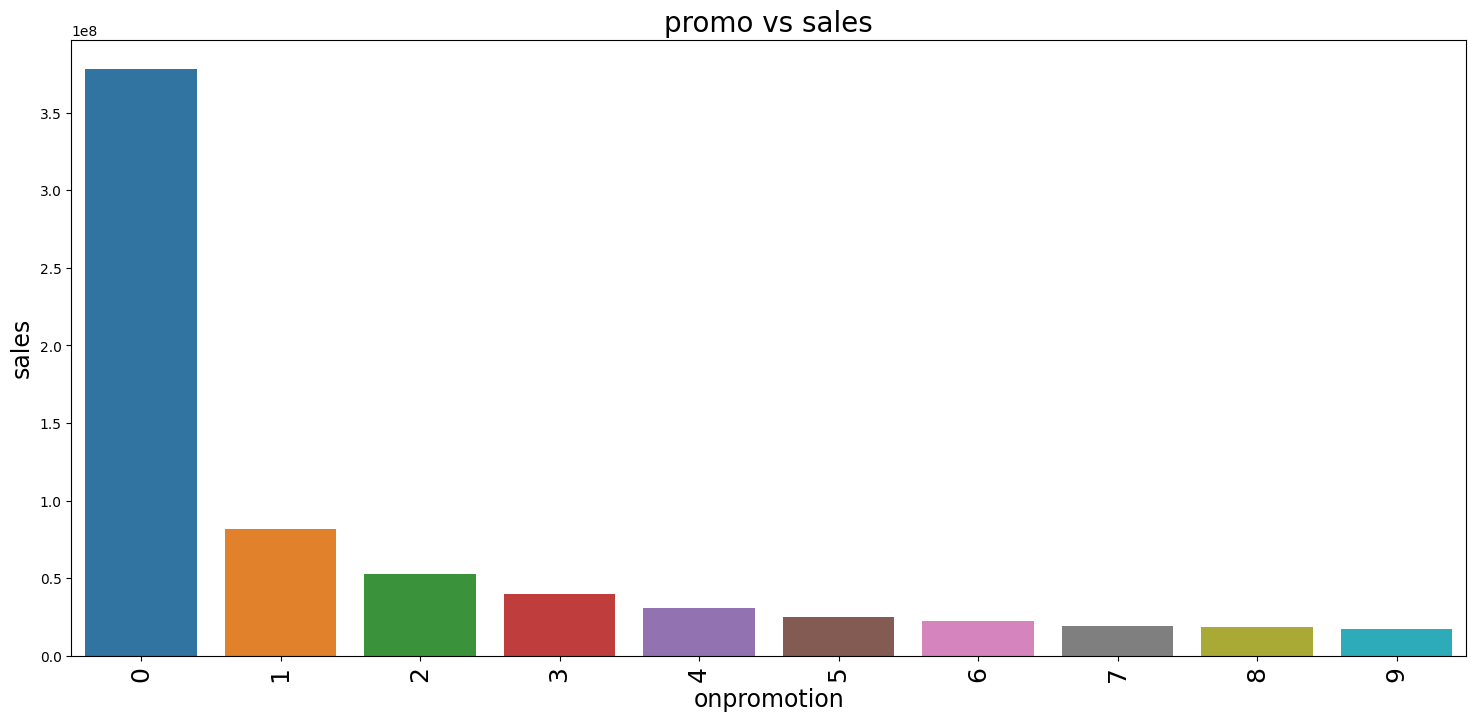

In [ ]:
plots=plt.figure(figsize=(18,8))
plots=plt.title('promo vs sales',fontsize=20)
plots=plt.xticks((0,1))
plots=plt.xticks(fontsize=18,rotation='vertical')
plots=plt.xlabel('not_onpromotion / onpromotion',fontsize=17)
plots=plt.ylabel('sales',fontsize=17)
plots=sns.barplot(x='onpromotion',y='sales',data=onpromo)
plt.savefig('promo.png',dpi=300)


Items that are not on promotion, have higher sales than items on protion. This means very few items are on promotion. 0 was used to note Items that are not on promotion.

In [ ]:
stores.head(5)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
#no_of_stores_per_state = stores.groupby(['state'], as_index=False).agg({'store_nbr':'sum'})

**Which state had the highest number of stores**

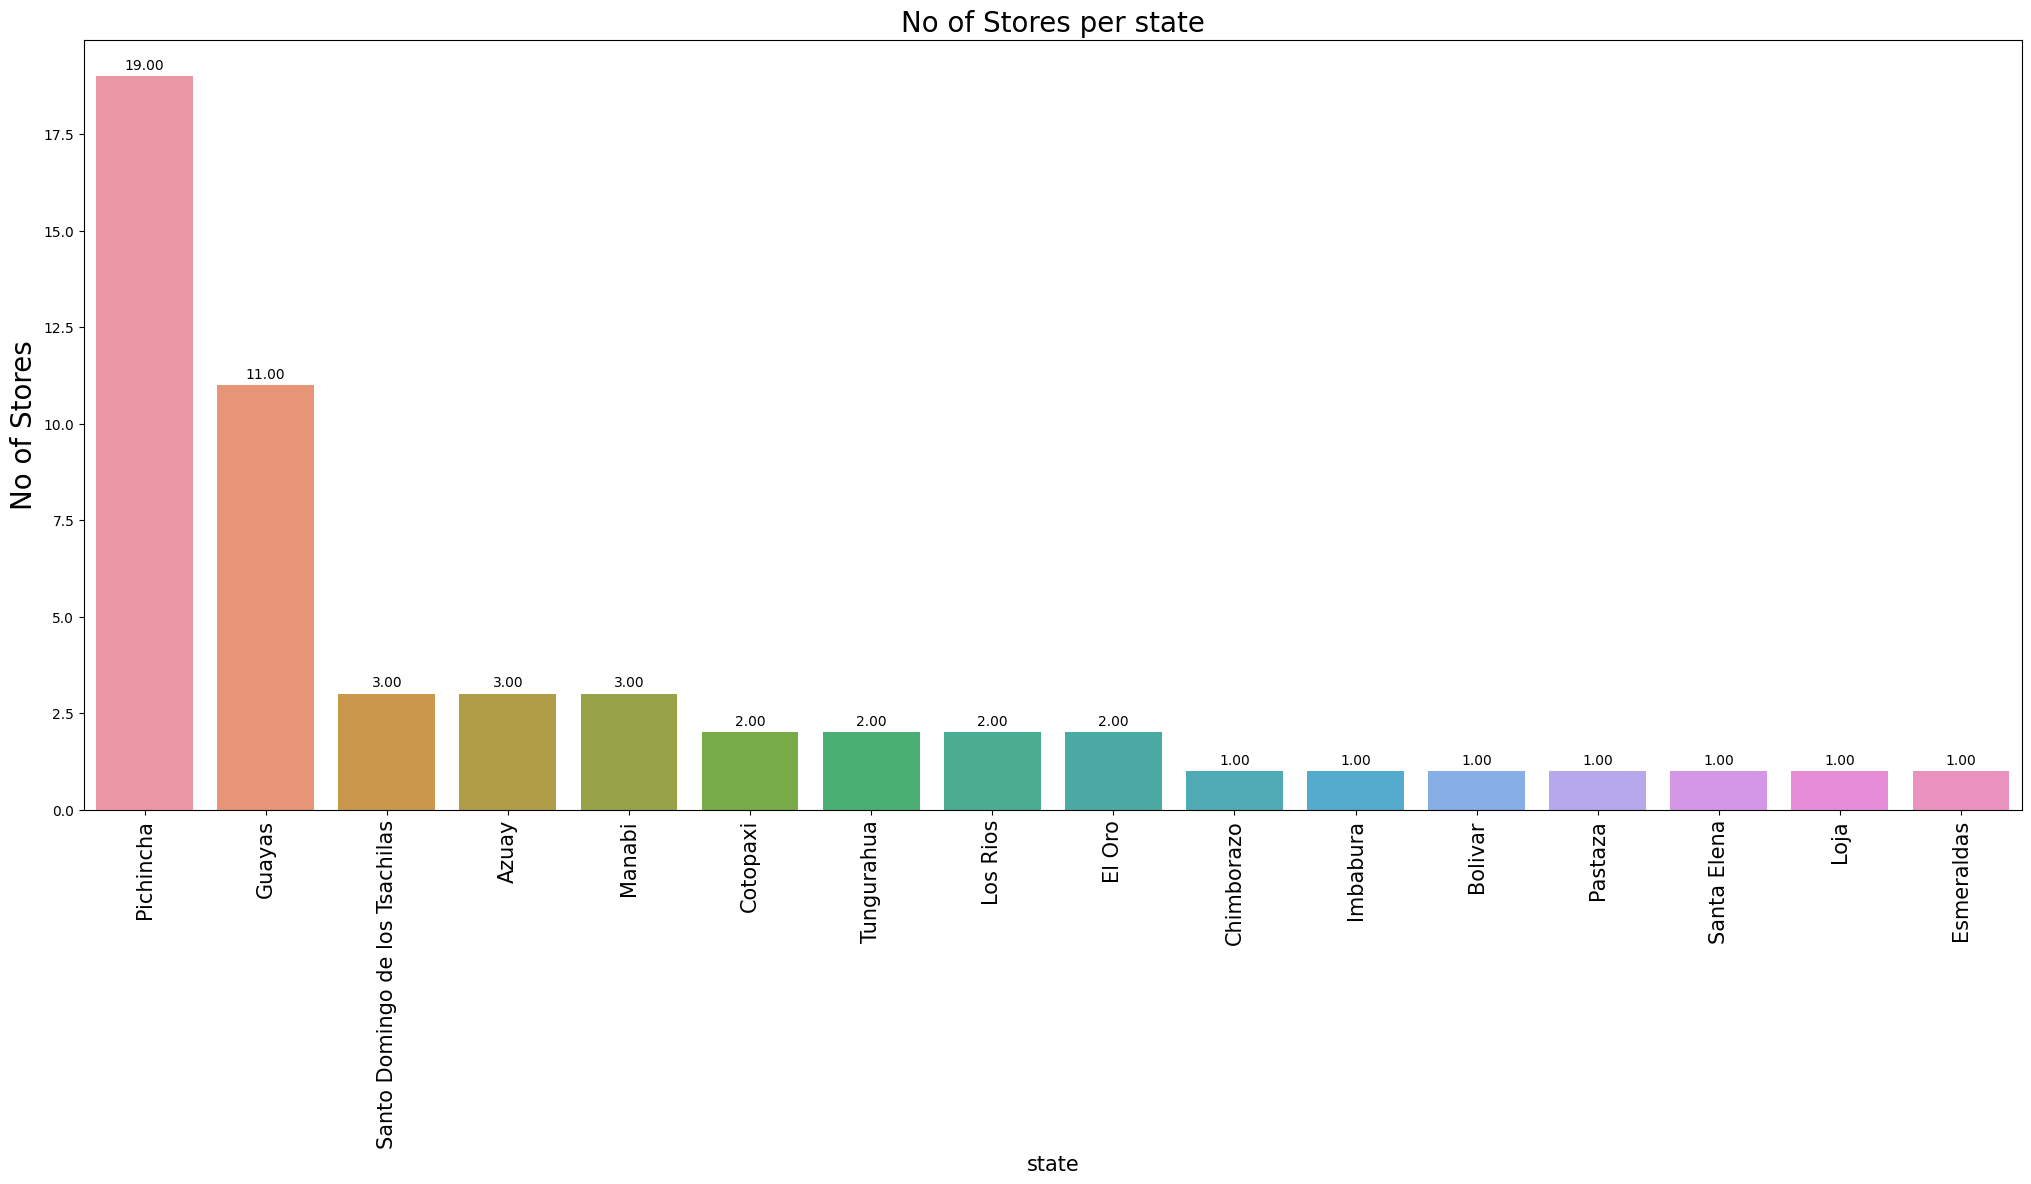

In [ ]:
#Fetching no.of stores in each state
x = stores.state.value_counts().to_frame()

#Plotting city Vs no.of stores
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
plots = sns.barplot(x = x.index, y= "state",data=x)
plots.set_xticklabels(ax.get_xticklabels(), rotation = 'vertical', fontsize = 15)
#plots=plt.xticks(fontsize=18,rotation='vertical')
plt.title('No of Stores per state',fontsize=20)
plt.xlabel('state',fontsize=15)
plt.ylabel('No of Stores',fontsize=20)

for bar in plots.patches:
 plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points')
plt.show()

Pichincha state had the most number of stores.

**state with highest sales**

In [ ]:
#fetching sales data from train dataset
store_sales = pd.merge(stores , train[['store_nbr' , 'sales']], on= 'store_nbr', how= 'left')
store_sales

,store_nbr,city,state,type,cluster,sales
0,1,Quito,Pichincha,D,13,0.000
1,1,Quito,Pichincha,D,13,0.000
2,1,Quito,Pichincha,D,13,0.000
3,1,Quito,Pichincha,D,13,0.000
4,1,Quito,Pichincha,D,13,0.000
...,...,...,...,...,...,...
3000883,54,El Carmen,Manabi,C,3,59.619
3000884,54,El Carmen,Manabi,C,3,94.000
3000885,54,El Carmen,Manabi,C,3,915.371
3000886,54,El Carmen,Manabi,C,3,0.000


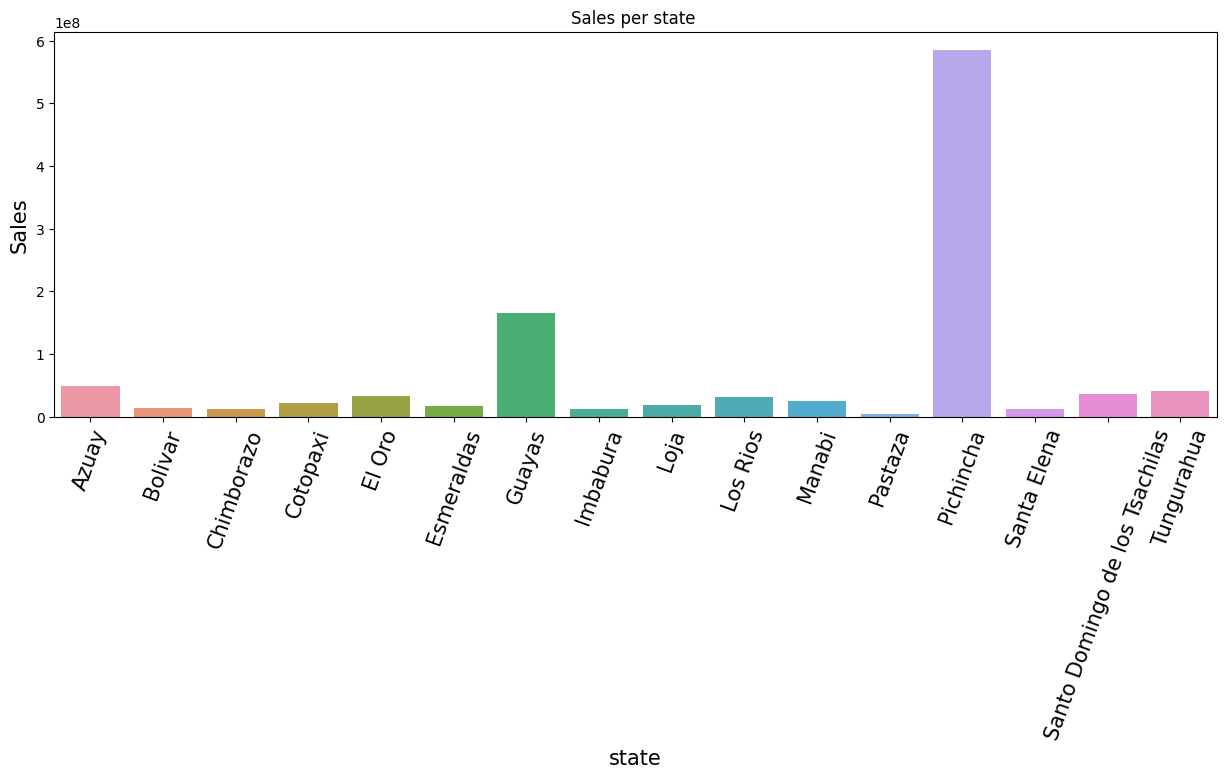

In [ ]:
#Group by city and sum of sales for each city
x = store_sales.groupby(['state'], as_index=False).agg({'sales':'sum'}) 

#Plotting city Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax = sns.barplot(x = x.state, y= "sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 15)
plt.title("Sales per state ")
plt.ylabel('Sales',fontsize=15)
plt.xlabel('state',fontsize=15)
plt.show()

Pichincha has the maximum sales(as it has the highest number of stores). followed by Guayas.
The other states have lower sales.

**Which city had the highest number of stores/Number of stores per city**

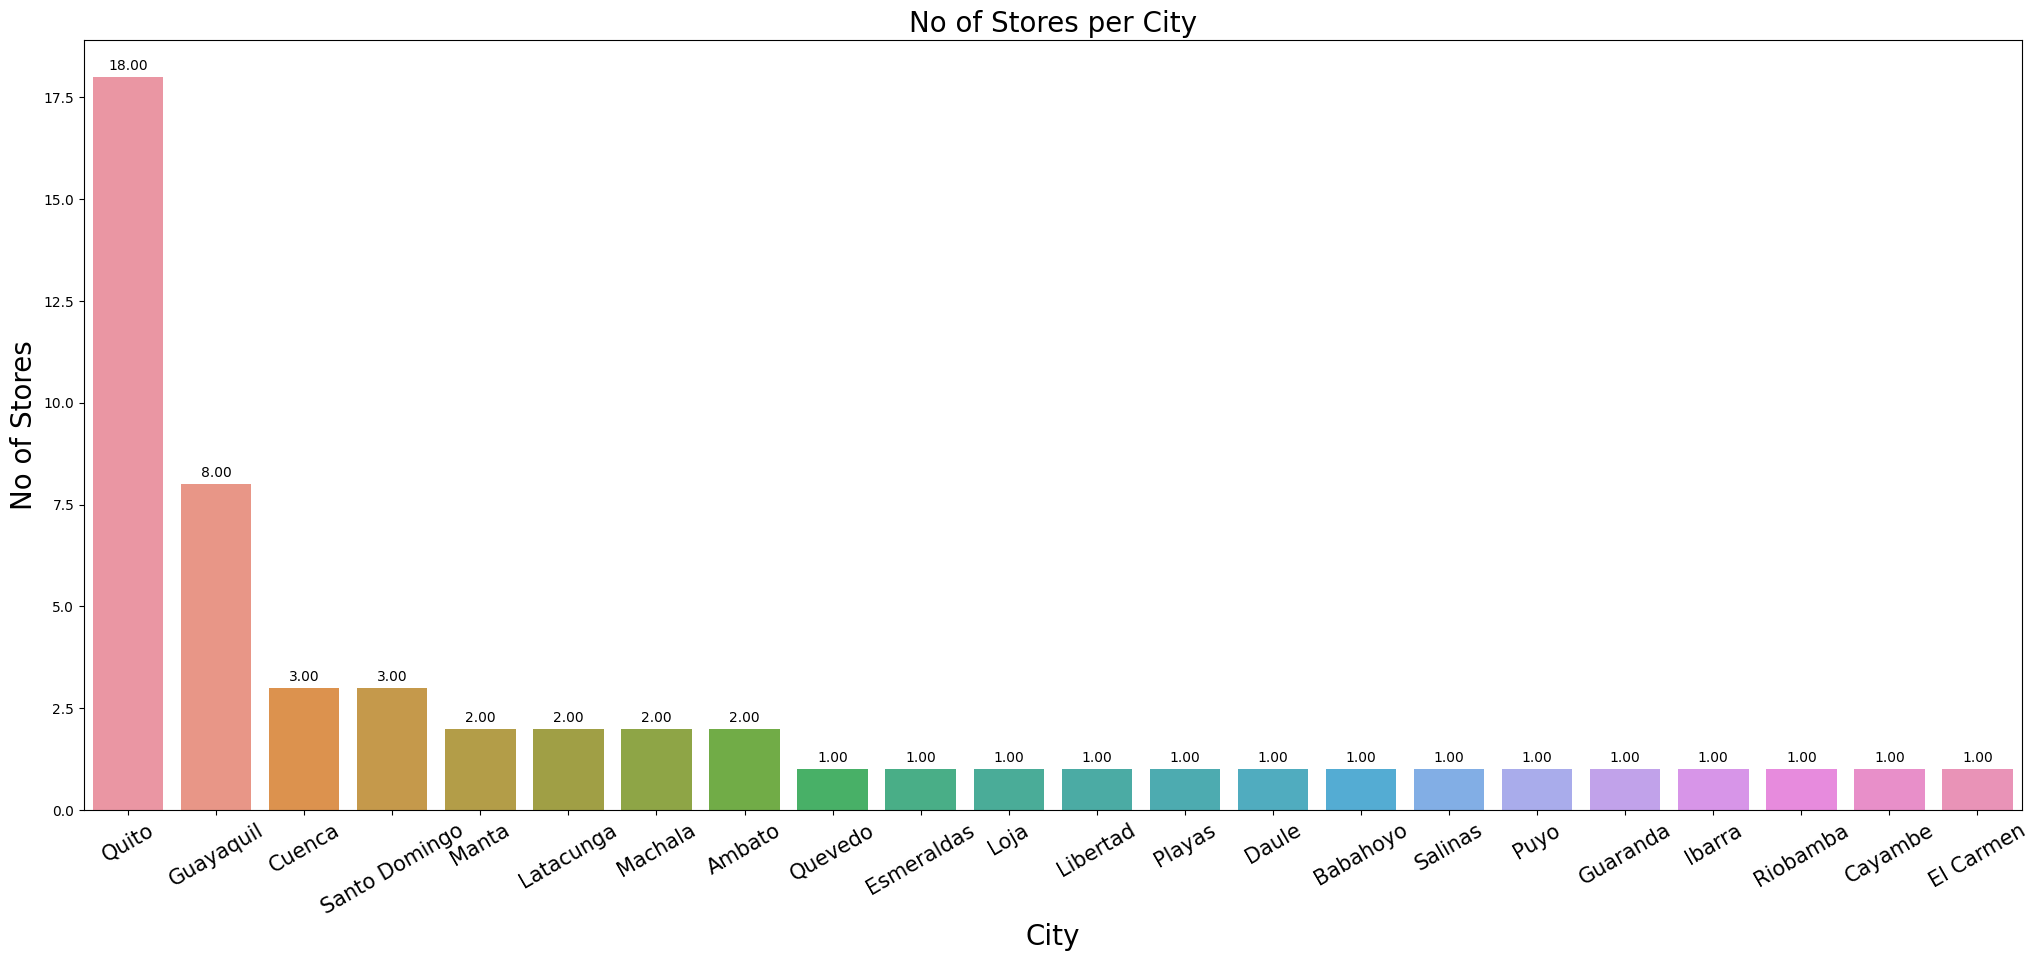

In [ ]:
#Fetching no.of stores in each city
x=stores.city.value_counts().to_frame()

#Plotting city Vs no.of stores
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
plots = sns.barplot(x = x.index, y= "city",data=x)
plots.set_xticklabels(ax.get_xticklabels(), rotation = 30, fontsize = 15)
plt.title('No of Stores per City',fontsize=20)
plt.xlabel('City',fontsize=20)
plt.ylabel('No of Stores',fontsize=20)

for bar in plots.patches:
 plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points')
plt.show()


The city Quito has the highest number of stores.

**city with highest sales**

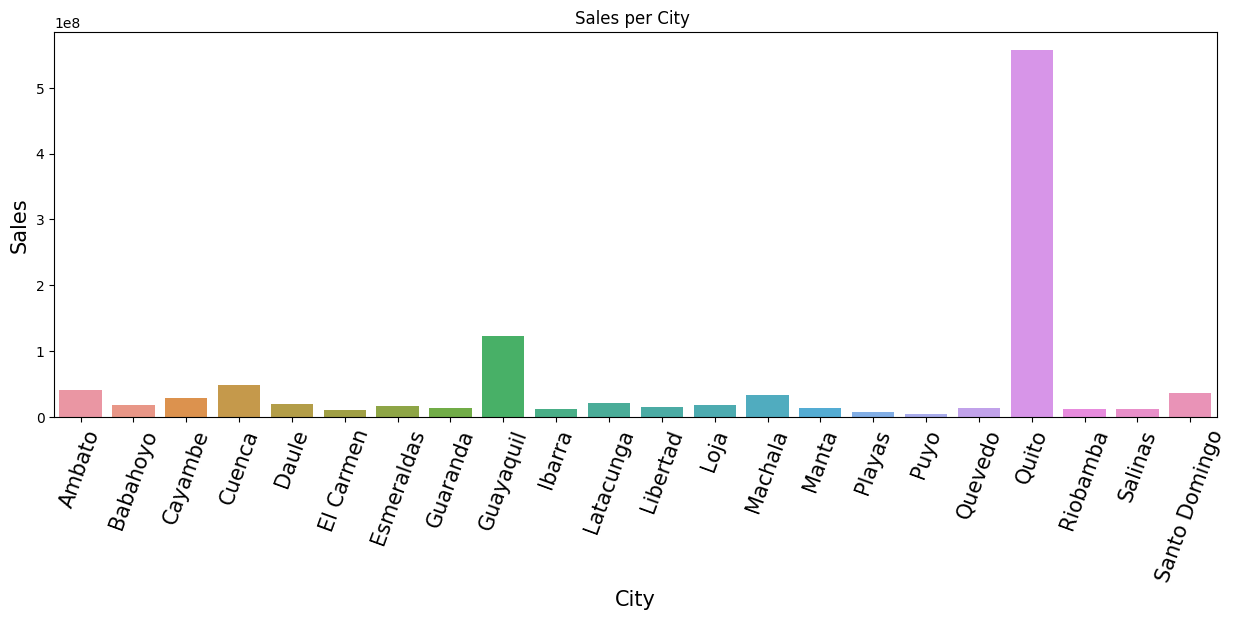

In [ ]:
#Group by city and sum of sales for each city
x = store_sales.groupby(['city'], as_index=False).agg({'sales':'sum'}) 

#Plotting city Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax = sns.barplot(x = x.city, y= "sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 15)
plt.title("Sales per City ")
plt.ylabel('Sales',fontsize=15)
plt.xlabel('City',fontsize=15)
plt.show()

Quito has the maximum sales as it has the maximum no. of stores. Followed by Guayaquil.

In [ ]:
holidays_events.head(5)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


**Which locale has the most holidays**

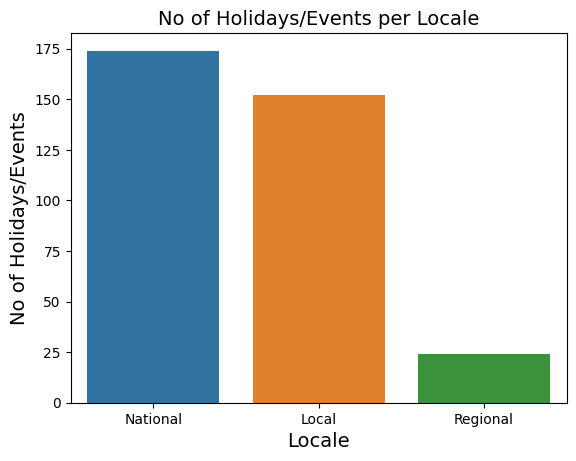

In [ ]:
#Fetching no.of days for each locale 
holidays = holidays_events.locale.value_counts().to_frame()

#Plotting Locale Vs no_of_days
fig, ax = plt.subplots()
ax = sns.barplot(x = holidays.index, y= "locale",data=holidays)
plt.title('No of Holidays/Events per Locale',fontsize=14)
plt.xlabel('Locale',fontsize=14)
plt.ylabel('No of Holidays/Events',fontsize=14)
plt.show()

The bar chart shows that most holidays or events are national followed by local before regional.

**Sales per Locale**

In [ ]:
#we first merge the data
holidays_events['date'] = holidays_events['date'].astype('datetime64')
holidays_sales = pd.merge(holidays_events , train[['date' , 'sales']], on= 'date', how= 'left')
holidays_sales

,date,type,locale,locale_name,description,transferred,sales
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,NaN
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,NaN
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,NaN
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,NaN
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,NaN
...,...,...,...,...,...,...,...
502587,2017-12-22,Additional,National,Ecuador,Navidad-3,False,NaN
502588,2017-12-23,Additional,National,Ecuador,Navidad-2,False,NaN
502589,2017-12-24,Additional,National,Ecuador,Navidad-1,False,NaN
502590,2017-12-25,Holiday,National,Ecuador,Navidad,False,NaN


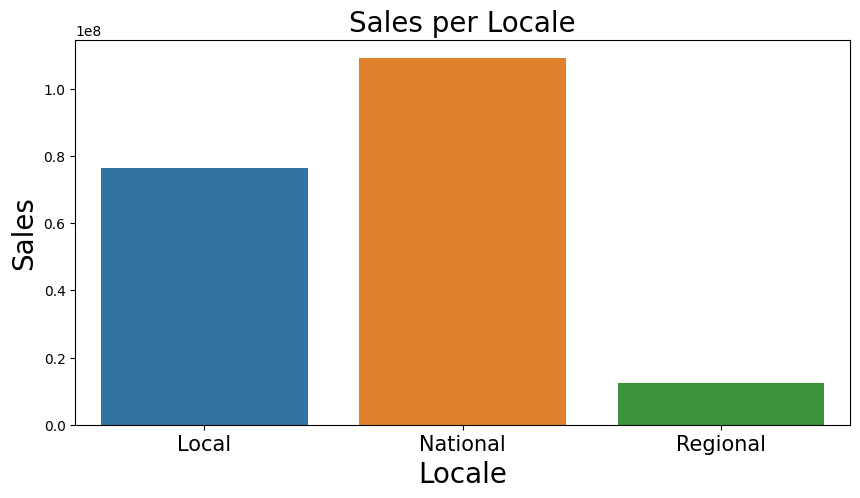

In [ ]:
#Group by locale and sum of sales for each locale
x = holidays_sales.groupby(['locale'], as_index=False).agg({'sales':'sum'}) 

#Plotting locale Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.barplot(x = x.locale, y= "sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 15)
plt.ylabel('Sales', fontsize= 20)
plt.xlabel('Locale', fontsize= 20)
plt.title('Sales per Locale',fontsize= 20)
plt.show()

Maximum sales happens on National Holidays/Events followed by Local Holidays/Events. Regional has the least sales as it also has the least no of holidays.

In [ ]:
oil_prices.head(10)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


In [ ]:
# using backfill to fill nan values

oil_prices['date'] = oil_prices['date'].astype('datetime64')
oil_prices = oil_prices.fillna(method = 'backfill')
oil_prices.iloc[[0,1,1216,1217],:]

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
1216,2017-08-30,45.96
1217,2017-08-31,47.26


In [ ]:
#we merge the data
oil_prices['date'] = oil_prices['date'].astype('datetime64')
oil_prices_sales = pd.merge(oil_prices , train[['date' , 'sales']], on= 'date', how= 'left')
oil_prices_sales

,date,dcoilwtico,sales
0,2013-01-01,93.14,0.0
1,2013-01-01,93.14,0.0
2,2013-01-01,93.14,0.0
3,2013-01-01,93.14,0.0
4,2013-01-01,93.14,0.0
...,...,...,...
2143756,2017-08-25,47.65,NaN
2143757,2017-08-28,46.40,NaN
2143758,2017-08-29,46.46,NaN
2143759,2017-08-30,45.96,NaN


In [ ]:
# getting year out of the date column in the dataset.
oil_prices_sales['year'] = oil_prices_sales['date'].dt.year
oil_prices_sales

,date,dcoilwtico,sales,year
0,2013-01-01,93.14,0.0,2013
1,2013-01-01,93.14,0.0,2013
2,2013-01-01,93.14,0.0,2013
3,2013-01-01,93.14,0.0,2013
4,2013-01-01,93.14,0.0,2013
...,...,...,...,...
2143756,2017-08-25,47.65,NaN,2017
2143757,2017-08-28,46.40,NaN,2017
2143758,2017-08-29,46.46,NaN,2017
2143759,2017-08-30,45.96,NaN,2017


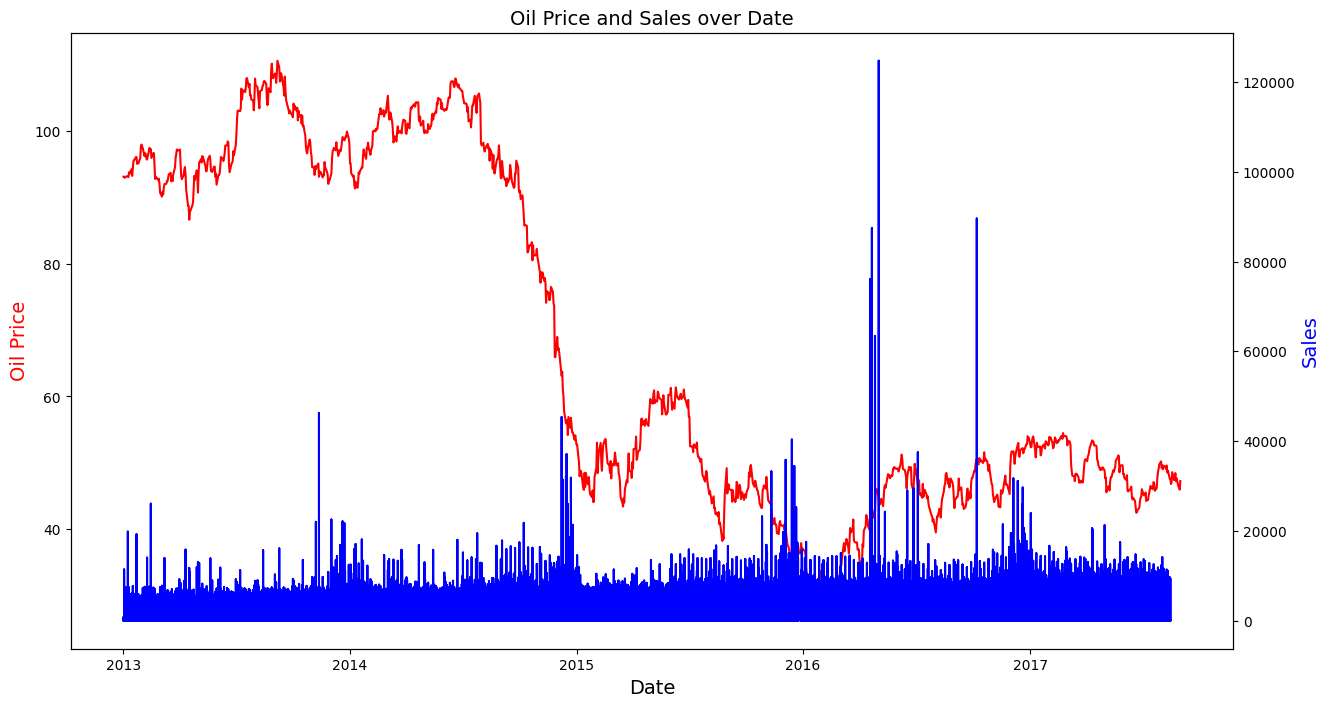

In [ ]:
#Plotting date vs oil price(1st y axis) 
fig,ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(oil_prices_sales.date, oil_prices_sales.dcoilwtico, color="red")
x = oil_prices_sales
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Oil Price",color="red",fontsize=14)
ax.figsize=(50,11)

#Plotting date vs unit_sales(2nd y axis) 
ax2=ax.twinx()   # twin object for two different y-axis on the sample plot
ax2.plot(x.date, x.sales, color="blue")  # make a plot with different y-axis using second axis object
ax2.set_ylabel("Sales",color="blue",fontsize=14)
plt.title('Oil Price and Sales over Date',fontsize=14)
plt.show()

In [ ]:
oil_prices_per_date = oil_prices_sales.groupby(['year'], as_index=False).agg({'dcoilwtico':'sum'})
oil_prices_per_date

,year,dcoilwtico
0,2013,45394018.74
1,2014,43202452.73
2,2015,22565324.16
3,2016,20105486.28
4,2017,14267740.06


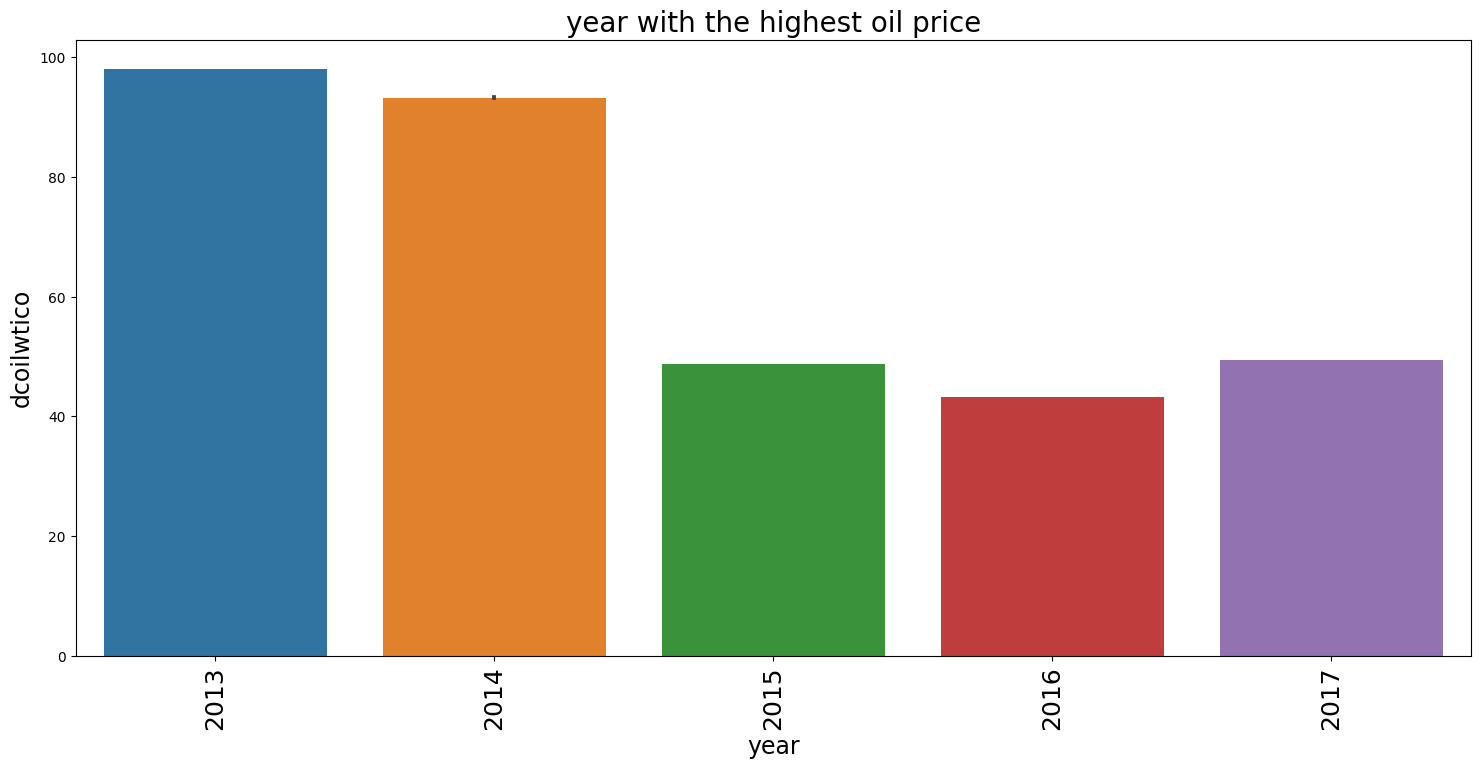

In [ ]:
#plotting oil prices per year
plots=plt.figure(figsize=(18,8))
plots=plt.title('year with the highest oil price',fontsize=20)
plots=plt.xticks(fontsize=18,rotation='vertical')
plots=plt.xlabel('store_nbr',fontsize=17)
plots=plt.ylabel('sales',fontsize=17)
plots=sns.barplot(x='year',y='dcoilwtico',data = oil_prices_sales)
plt.savefig('top10startups.png',dpi=300)

By analysing the above plots, we can see that it is difficult to interprete a link between oil prices and sale. i.e - oil prices and sales are not much related

**Summary**
Year and Month would also be added as features for sales prediciton.

Store Features such as city, state, type, and cluster are important for predicting sales.

Item Features including family, class, and perishable are also important and would be used for prediction.

Locale and Type of Holiday/events features can be also be considered.

Oil price is not much related so it can be discarded.